## Importing Libraries & getting data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("dataset/spam_ham_dataset.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
# dropping Unamed & label_num as unwanted columns

data = data.drop(["Unnamed: 0", "label_num"], axis=1)
data.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


## Handling Missing Values

In [5]:
data.isnull().sum()

label    0
text     0
dtype: int64

## Encoding

In [6]:
# Converting ham/spam to 1/0

data['type'] = data.label.map({'ham':1 , 'spam':0})
data

,label,text,type
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,1
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",1
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",1
3,spam,"Subject: photoshop , windows , office . cheap ...",0
4,ham,Subject: re : indian springs\r\nthis deal is t...,1
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,1
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,1
5169,ham,Subject: industrial worksheets for august 2000...,1


In [7]:
# getting the values 

spam_ham_value = data.label.value_counts()
spam_ham_value

ham     3672
spam    1499
Name: label, dtype: int64

In [8]:
# getting spam percentage

print("Spam percentage : {} %".format(spam_ham_value[1] /
    float(spam_ham_value[0] + spam_ham_value[1]) * 100))

Spam percentage : 28.98859021465867 %


## Feature Selection

In [9]:
X = data.text
y = data.type

X.shape, y.shape

((5171,), (5171,))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3464,), (1707,), (3464,), (1707,))

In [11]:
X_train.head()

801     Subject: rough list\r\ni have compiled a list ...
1288    Subject: equistar 3 / 01\r\ndaren - here are t...
1558    Subject: desk summary report\r\nthe cpr report...
2407    Subject: nominations for eastrans reciept for ...
4675    Subject: eastrans nomination effective 07 / 01...
Name: text, dtype: object

## Building our Vocabulary 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
vectorized_corpus = cv.fit(X_train)

In [13]:
# cv.vocabulary_

In [14]:
# cv.get_feature_names()

In [15]:
len(cv.vocabulary_), len(cv.get_feature_names())

(40561, 40561)

In [16]:
# Transformation 
X_train_transformed = cv.transform(X_train)
X_test_transformed = cv.transform(X_test)

In [17]:
X_test[:1]

1566    Subject: hpl nom for march 30 , 2001\r\n( see ...
Name: text, dtype: object

In [18]:
print(X_test_transformed)

  (0, 886)	1
  (0, 1319)	1
  (0, 1444)	2
  (0, 6108)	1
  (0, 16769)	1
  (0, 20042)	1
  (0, 20047)	2
  (0, 24516)	1
  (0, 26733)	1
  (0, 35226)	1
  (0, 39905)	2
  (1, 3023)	2
  (1, 3861)	13
  (1, 4132)	13
  (1, 4492)	15
  (1, 5119)	13
  (1, 5257)	14
  (1, 5453)	13
  (1, 5504)	15
  (1, 6437)	13
  (1, 6644)	13
  (1, 6762)	14
  (1, 6809)	13
  (1, 7130)	13
  (1, 7140)	14
  :	:
  (1706, 28633)	1
  (1706, 28634)	1
  (1706, 28756)	1
  (1706, 29384)	1
  (1706, 29838)	1
  (1706, 29892)	1
  (1706, 31571)	1
  (1706, 31716)	1
  (1706, 32014)	1
  (1706, 32350)	1
  (1706, 33528)	1
  (1706, 33695)	1
  (1706, 34330)	1
  (1706, 34391)	1
  (1706, 35226)	1
  (1706, 35601)	1
  (1706, 36069)	1
  (1706, 36213)	1
  (1706, 36258)	1
  (1706, 36453)	1
  (1706, 37681)	1
  (1706, 38110)	1
  (1706, 38111)	1
  (1706, 39115)	1
  (1706, 39116)	1


## Naive Bayes Model

In [19]:
from sklearn.naive_bayes import BernoulliNB

model= BernoulliNB()
model.fit(X_train_transformed , y_train)

BernoulliNB()

In [20]:
# predicted class 
y_predict = model.predict(X_test_transformed)

# predicted probablity 
y_predicted_prob = model.predict_proba(X_test_transformed)

## Evaluation

In [21]:
from sklearn.metrics import accuracy_score ,confusion_matrix
accuracy_score(y_test ,y_predict)

0.836555360281195

### Confusion Matrix

In [22]:
cf_matrix = confusion_matrix(y_test ,y_predict)

TN = cf_matrix[0,0]
FP = cf_matrix[0, 1]
FN = cf_matrix[1, 0]
TP = cf_matrix[1,1]

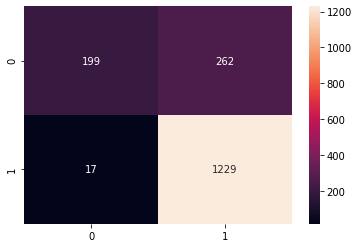

In [23]:
sns.heatmap(cf_matrix ,annot=True,fmt='.4g')
plt.show()

### Confusion Matrix list of rates

In [24]:
from sklearn import metrics

# aka True Positive Rate
sensitivity = TP / float(FN + TP)
print('Sensitivity :',sensitivity)

specificity = TN / float(TN + FP)
print('Specificity :', specificity)

precision = TP / float(TP + FP)
print("Precision : ", precision)

precision_metrics = metrics.precision_score(y_test, y_predict)
print("Precision (metrics) : ", precision_metrics)

print("PRECISION SCORE :", metrics.precision_score(y_test, y_predict))
print("RECALL SCORE :", metrics.recall_score(y_test, y_predict))
print("F1 SCORE :", metrics.f1_score(y_test, y_predict))

Sensitivity : 0.9863563402889246
Specificity : 0.4316702819956616
Precision :  0.824279007377599
Precision (metrics) :  0.824279007377599
PRECISION SCORE : 0.824279007377599
RECALL SCORE : 0.9863563402889246
F1 SCORE : 0.8980635732553892


## ROC Curve

In [25]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print(roc_auc)

0.8556517515485563


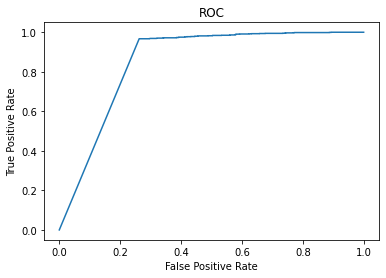

In [26]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.plot(false_positive_rate, true_positive_rate)
plt.show()